# Frequency and Distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# To recall, this is the code to mimic the roll dice game for 50 times

dice = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50
results = [dice.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [23]:
# This is the code for summarizing the results of sum of faces by frequency

freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
print(sort_freq)

2      3
3      1
4      5
5      6
6      2
7      5
8      9
9     14
10     2
11     3
Name: 0, dtype: int64


<AxesSubplot:>

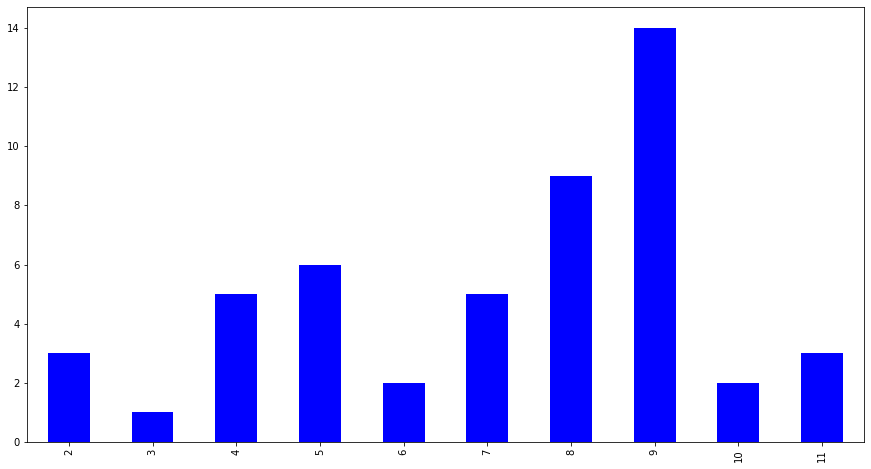

In [24]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

## Relative Frequency

<AxesSubplot:>

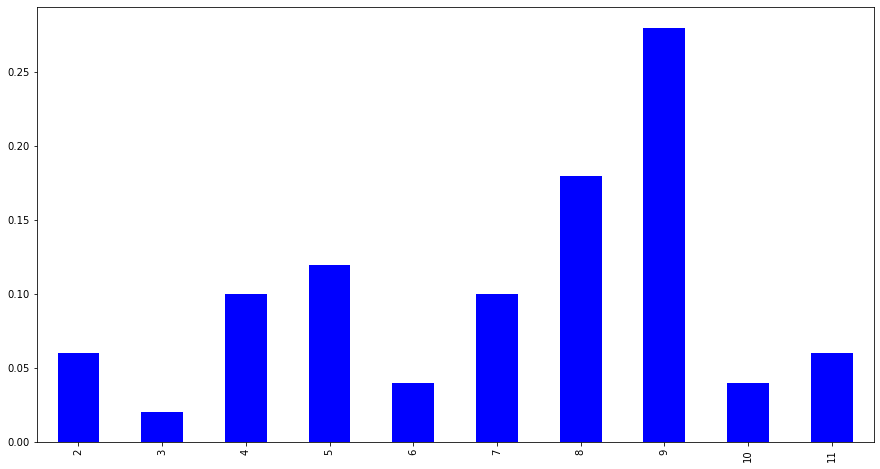

In [25]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

<AxesSubplot:>

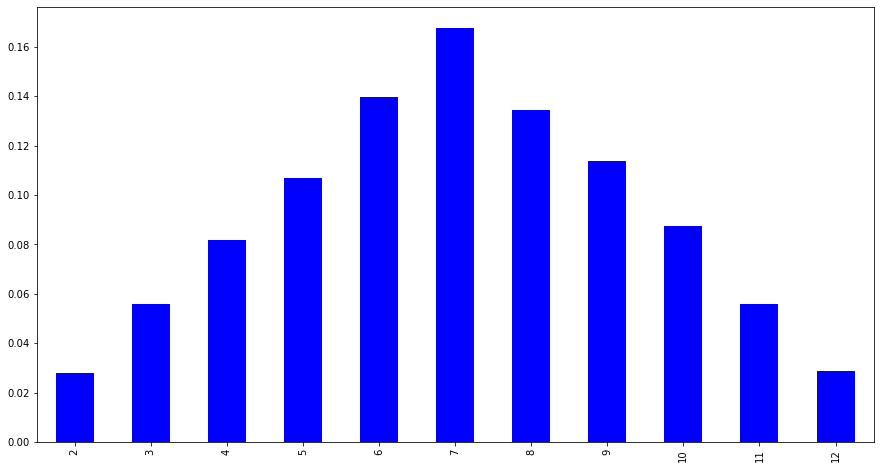

In [27]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [dice.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

### We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)

## Expectation and Variance of a distribution

In [28]:
# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [29]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [30]:
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print(mean, var)

6.999999999999998 5.833333333333333


## Empirical  mean and variance

In [32]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [dice.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [33]:
#print the mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

6.99155 5.847370966048341
